### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sys
sys.path.append("../../")   # to reach the Utils folder
from Utils import utils

In [2]:
data_folder_path = utils.find_project_root() + "/data"

### Load Checkin Dataset

In [3]:
checkin_df = pd.read_json(path_or_buf=f"{data_folder_path}/yelp_academic_dataset_checkin.json", lines=True)

def readapt_checkin_dataset(df: pd.DataFrame) -> pd.DataFrame:
    final_df = df.copy()
    final_df["count_dates"] = final_df["date"].apply(lambda dates: len(dates.split(",")))
    final_df.sort_values(by="count_dates", ascending=False, inplace=True)
    return final_df.reset_index(drop=True)


def transform_checkin_df(df: pd.DataFrame) -> pd.DataFrame:
    df["date"] = df["date"].str.split(", ")
    checkin_df = df.explode("date").reset_index(drop=True)
    checkin_df["date"] = pd.to_datetime(checkin_df["date"], format="mixed").dt.date

    return checkin_df

In [4]:
new_checkin_df = transform_checkin_df(checkin_df)
new_checkin_df

business_id        date
0         ---kPU91CF4Lq2-WlRu9Lw  2020-03-13
1         ---kPU91CF4Lq2-WlRu9Lw  2020-06-02
2         ---kPU91CF4Lq2-WlRu9Lw  2020-07-24
3         ---kPU91CF4Lq2-WlRu9Lw  2020-10-24
4         ---kPU91CF4Lq2-WlRu9Lw  2020-12-09
...                          ...         ...
13356870  zzu6_r3DxBJuXcjnOYVdTw  2013-12-11
13356871  zzu6_r3DxBJuXcjnOYVdTw  2013-12-13
13356872  zzw66H6hVjXQEt0Js3Mo4A  2016-12-03
13356873  zzw66H6hVjXQEt0Js3Mo4A  2018-12-02
13356874  zzyx5x0Z7xXWWvWnZFuxlQ  2015-01-06

[13356875 rows x 2 columns]

### Load Business Dataset

In [5]:
business_df = pd.read_json(path_or_buf=f"{data_folder_path}/yelp_academic_dataset_business.json", lines=True)
business_df

business_id                      name  \
0       Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2       tUFrWirKiKi_TAnsVWINQQ                    Target   
3       MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
...                        ...                       ...   
150341  IUQopTMmYQG-qRtBk-8QnA              Binh's Nails   
150342  c8GjPIOTGVmIemT7j5_SyQ      Wild Birds Unlimited   
150343  _QAMST-NrQobXduilWEqSw         Claire's Boutique   
150344  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
150345  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                                address           city state postal_code  \
0                1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1       87 Grasso Plaza Shopping Center         Affton    MO       63123   
2                  5255 E Broadway Blvd         Tucson    AZ       85711   
3                           935 Race St   Philadelphia    PA       19107   
4                         101 Walnut St     Green Lane    PA       18054   
...                                 ...            ...   ...         ...   
150341                3388 Gateway Blvd       Edmonton    AB     T6J 5H2   
150342               2813 Bransford Ave      Nashville    TN       37204   
150343           6020 E 82nd St, Ste 46   Indianapolis    IN       46250   
150344                     2472 Troy Rd   Edwardsville    IL       62025   
150345            238 Apollo Beach Blvd   Apollo beach    FL       33572   

         latitude   longitude  stars  review_count  is_open  \
0       34.426679 -119.711197    5.0             7        0   
1       38.551126  -90.335695    3.0            15        1   
2       32.223236 -110.880452    3.5            22        0   
3       39.955505  -75.155564    4.0            80        1   
4       40.338183  -75.471659    4.5            13        1   
...           ...         ...    ...           ...      ...   
150341  53.468419 -113.492054    3.0            13        1   
150342  36.115118  -86.766925    4.0             5        1   
150343  39.908707  -86.065088    3.5             8        1   
150344  38.782351  -89.950558    4.0            24        1   
150345  27.771002  -82.394910    4.5             9        1   

                                               attributes  \
0                           {'ByAppointmentOnly': 'True'}   
1                  {'BusinessAcceptsCreditCards': 'True'}   
2       {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3       {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4       {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   
...                                                   ...   
150341  {'ByAppointmentOnly': 'False', 'RestaurantsPri...   
150342  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
150343  {'RestaurantsPriceRange2': '1', 'BusinessAccep...   
150344  {'BusinessParking': '{'garage': False, 'street...   
150345  {'WheelchairAccessible': 'True', 'BusinessAcce...   

                                               categories  \
0       Doctors, Traditional Chinese Medicine, Naturop...   
1       Shipping Centers, Local Services, Notaries, Ma...   
2       Department Stores, Shopping, Fashion, Home & G...   
3       Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                               Brewpubs, Breweries, Food   
...                                                   ...   
150341                         Nail Salons, Beauty & Spas   
150342  Pets, Nurseries & Gardening, Pet Stores, Hobby...   
150343  Shopping, Jewelry, Piercing, Toy Stores, Beaut...   
150344  Fitness/Exercise Equipment, Eyewear & Optician...   
150345  Beauty & Spas, Permanent Makeup, Piercing, Tattoo   

                                                    hours  
0                                                    None  
1       {'Monday': '0:0-0:0', 'Tuesday': '

### Merge business and checkins dataframes

In [6]:
merged_df = new_checkin_df.merge(business_df, how="left")
merged_df

business_id        date                            name  \
0         ---kPU91CF4Lq2-WlRu9Lw  2020-03-13               Frankie's Raw Bar   
1         ---kPU91CF4Lq2-WlRu9Lw  2020-06-02               Frankie's Raw Bar   
2         ---kPU91CF4Lq2-WlRu9Lw  2020-07-24               Frankie's Raw Bar   
3         ---kPU91CF4Lq2-WlRu9Lw  2020-10-24               Frankie's Raw Bar   
4         ---kPU91CF4Lq2-WlRu9Lw  2020-12-09               Frankie's Raw Bar   
...                          ...         ...                             ...   
13356870  zzu6_r3DxBJuXcjnOYVdTw  2013-12-11                    Cafe Diblasi   
13356871  zzu6_r3DxBJuXcjnOYVdTw  2013-12-13                    Cafe Diblasi   
13356872  zzw66H6hVjXQEt0Js3Mo4A  2016-12-03  Sullivan Farms Christmas Trees   
13356873  zzw66H6hVjXQEt0Js3Mo4A  2018-12-02  Sullivan Farms Christmas Trees   
13356874  zzyx5x0Z7xXWWvWnZFuxlQ  2015-01-06             Walnut Street Pizza   

                          address             city state postal_code  \
0                4903 State Rd 54  New Port Richey    FL       34652   
1                4903 State Rd 54  New Port Richey    FL       34652   
2                4903 State Rd 54  New Port Richey    FL       34652   
3                4903 State Rd 54  New Port Richey    FL       34652   
4                4903 State Rd 54  New Port Richey    FL       34652   
...                           ...              ...   ...         ...   
13356870  1801 Stumpf Blvd, Ste 4           Gretna    LA       70056   
13356871  1801 Stumpf Blvd, Ste 4           Gretna    LA       70056   
13356872      14614 Manchester Rd          Ballwin    MO       63011   
13356873      14614 Manchester Rd          Ballwin    MO       63011   
13356874           200 S Broad St     Philadelphia    PA       19102   

           latitude  longitude  stars  review_count  is_open  \
0         28.217288 -82.733344    4.5            24        1   
1         28.217288 -82.733344    4.5            24        1   
2         28.217288 -82.733344    4.5            24        1   
3         28.217288 -82.733344    4.5            24        1   
4         28.217288 -82.733344    4.5            24        1   
...             ...        ...    ...           ...      ...   
13356870  29.911358 -90.035558    3.5             8        0   
13356871  29.911358 -90.035558    3.5             8        0   
13356872  38.592897 -90.527920    3.5             5        1   
13356873  38.592897 -90.527920    3.5             5        1   
13356874  39.949183 -75.164777    2.5             6        0   

                                                 attributes  \
0         {'Alcohol': 'u'none'', 'OutdoorSeating': 'True...   
1         {'Alcohol': 'u'none'', 'OutdoorSeating': 'True...   
2         {'Alcohol': 'u'none'', 'OutdoorSeating': 'True...   
3         {'Alcohol': 'u'none'', 'OutdoorSeating': 'True...   
4         {'Alcohol': 'u'none'', 'OutdoorSeating': 'True...   
...                                                     ...   
13356870  {'OutdoorSeating': 'False', 'Alcohol': 'u'full...   
13356871  {'OutdoorSeating': 'False', 'Alcohol': 'u'full...   
13356872  {'BusinessParking': '{'garage': False, 'street...   
13356873  {'BusinessParking': '{'garage': False, 'street...   
13356874  {'RestaurantsTableService': 'False', 'BikePark...   

                                                 categories  \
0         Seafood, Restaurants, Latin American, Food, Fo...   
1         Seafood, Restaurants, Latin American, Food, Fo...   
2         Seafood, Restaurants, Latin American, Food, Fo...   
3         Seafood, Restaurants, Latin American, Food, Fo...   
4         Seafood, Restaurants, Latin American, Food, Fo...   
...                                                     ...   
13356870                        Restaurants, Cafes, Italian   
13356871                        Restaurants, Cafes, Italian   
13356872  Nurseries & Gardening, Home Services, Shopping...   
13356873  Nurseries & Gardening, Home S

In [7]:
community_series = pd.read_csv("community.csv").iloc[:, 0]
community_series

0      kxX2SOes4o-D3ZQBkiMRfA
1      Dv6RfXLYe1atjgz3Xf4GGw
2      S8ZFYEgMejpChID8tzKo9A
3      IjMs1n7UelI7ev_5IDl5kA
4      eJaeTZlIdM3HWCq__Ve4Wg
                ...          
397    xrUtLEFyxzfjflTC2nqLXQ
398    bACIZGdHRFfNtrufH0wMbQ
399    Je10gqBQIqSvYNS8XGrYnw
400    xz_RcwDtr8_nHWnSj-oU-A
401    JxRSBtTNuLULDfKI3YGQSA
Name: 0, Length: 402, dtype: object

In [8]:
filtered_merged_df = merged_df[merged_df["business_id"].isin(community_series)]
filtered_merged_df

business_id        date         name             address  \
42249     -ATiAtTikuGuqvaW2O6tNA  2010-02-14     Marathon       121 S 16th St   
42250     -ATiAtTikuGuqvaW2O6tNA  2010-02-20     Marathon       121 S 16th St   
42251     -ATiAtTikuGuqvaW2O6tNA  2010-05-07     Marathon       121 S 16th St   
42252     -ATiAtTikuGuqvaW2O6tNA  2010-07-31     Marathon       121 S 16th St   
42253     -ATiAtTikuGuqvaW2O6tNA  2010-08-06     Marathon       121 S 16th St   
...                          ...         ...          ...                 ...   
13346045  zwTmOj4B_OVPMTMYijQiKg  2019-02-11  Queen Sheba  4511 Baltimore Ave   
13346046  zwTmOj4B_OVPMTMYijQiKg  2019-12-04  Queen Sheba  4511 Baltimore Ave   
13346047  zwTmOj4B_OVPMTMYijQiKg  2020-03-11  Queen Sheba  4511 Baltimore Ave   
13346048  zwTmOj4B_OVPMTMYijQiKg  2021-02-14  Queen Sheba  4511 Baltimore Ave   
13346049  zwTmOj4B_OVPMTMYijQiKg  2021-08-28  Queen Sheba  4511 Baltimore Ave   

                  city state postal_code   latitude  longitude  stars  \
42249     Philadelphia    PA       19102  39.950483 -75.167331    3.5   
42250     Philadelphia    PA       19102  39.950483 -75.167331    3.5   
42251     Philadelphia    PA       19102  39.950483 -75.167331    3.5   
42252     Philadelphia    PA       19102  39.950483 -75.167331    3.5   
42253     Philadelphia    PA       19102  39.950483 -75.167331    3.5   
...                ...   ...         ...        ...        ...    ...   
13346045  Philadelphia    PA       19143  39.948995 -75.213549    4.0   
13346046  Philadelphia    PA       19143  39.948995 -75.213549    4.0   
13346047  Philadelphia    PA       19143  39.948995 -75.213549    4.0   
13346048  Philadelphia    PA       19143  39.948995 -75.213549    4.0   
13346049  Philadelphia    PA       19143  39.948995 -75.213549    4.0   

          review_count  is_open  \
42249              593        1   
42250              593        1   
42251              593        1   
42252              593        1   
42253              593        1   
...                ...      ...   
13346045            64        1   
13346046            64        1   
13346047            64        1   
13346048            64        1   
13346049            64        1   

                                                 attributes  \
42249     {'RestaurantsAttire': ''casual'', 'Alcohol': '...   
42250     {'RestaurantsAttire': ''casual'', 'Alcohol': '...   
42251     {'RestaurantsAttire': ''casual'', 'Alcohol': '...   
42252     {'RestaurantsAttire': ''casual'', 'Alcohol': '...   
42253     {'RestaurantsAttire': ''casual'', 'Alcohol': '...   
...                                                     ...   
13346045  {'BusinessParking': '{'garage': False, 'street...   
13346046  {'BusinessParking': '{'garage': False, 'street...   
13346047  {'BusinessParking': '{'garage': False, 'street...   
13346048  {'BusinessParking': '{'garage': False, 'street...   
13346049  {'BusinessParking': '{'garage': False, 'street...   

                                                 categories  \
42249     Sandwiches, American (New), Lounges, Nightlife...   
42250     Sandwiches, American (New), Lounges, Nightlife...   
42251     Sandwiches, American (New), Lounges, Nightlife...   
42252     Sandwiches, American (New), Lounges, Nightlife...   
42253     Sandwiches, American (New), Lounges, Nightlife...   
...                                                     ...   
13346045  Nightlife, Restaurants, Sports Bars, Bars, Eth...   
13346046  Nightlife, Restaurants, Sports Bars, Bars, Eth...   
13346047  Nightlife, Restaurants, Sports Bars, Bars, Eth...   
13346048  Nightlife, Restaurants, Sports Bars, Bars, Eth...   
13346049  Nightlife, Restaurants, Sports Bars, Bars, Eth...   

                                                      hours  
42249     {'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...  
42250     {'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...  
42251     {'Monday': '11:0-21:0', 'Tuesday': '11:0

: 

In [19]:
ts = filtered_merged_df.groupby("date").size().reset_index(name="checkins")
ts

date  checkins
0     2010-01-16         6
1     2010-01-17         8
2     2010-01-18         8
3     2010-01-19         4
4     2010-01-20         1
...          ...       ...
4360  2022-01-15        19
4361  2022-01-16        19
4362  2022-01-17        13
4363  2022-01-18         5
4364  2022-01-19         4

[4365 rows x 2 columns]

In [20]:
ts.to_csv("community_ts.csv", index=False)

### Get most frequented cities

In [7]:
checkins_by_city = merged_df.groupby("city").size()\
    .reset_index(name="count_checkins")\
        .sort_values(by="count_checkins", ascending=False)\
            .reset_index(drop=True)

checkins_by_city

city  count_checkins
0                   Philadelphia         1838206
1                    New Orleans         1486495
2                          Tampa          918203
3                   Indianapolis          886001
4                      Nashville          817283
...                          ...             ...
1296             New Berlinville               1
1297                  Crosswicks               1
1298                   Covington               1
1299                  Costa Mesa               1
1300  Westmont - Haddon Towsship               1

[1301 rows x 2 columns]

In [8]:
top5_cities = checkins_by_city.iloc[:5, :].city.values
top5_cities

array(['Philadelphia', 'New Orleans', 'Tampa', 'Indianapolis',
       'Nashville'], dtype=object)

### EDA

In [9]:
def remove_outliers_from_ds(ds: pd.Series, k: int = 1.5) -> pd.Series:
    # Calculate the Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = ds.quantile(0.25)
    Q3 = ds.quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the outlier boundaries (k * IQR rule)
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Return the filtered Series with outliers removed
    return ds[(ds >= lower_bound) & (ds <= upper_bound)]


def show_distribution(df: pd.DataFrame, target_col: str, type: str, remove_outliers: bool=False) -> None:
    grouped_df = df.groupby(target_col).size().reset_index(name='count')

    if remove_outliers:
        non_outliers = remove_outliers_from_ds(grouped_df["count"], k=1.5).values
        grouped_df = grouped_df[grouped_df["count"].isin(non_outliers)]

    if type.lower() == "histogram":
        sns.histplot(data=grouped_df, x="count")
    elif type.lower() == "boxplot":
        sns.boxplot(data=grouped_df, x="count")
    else:
        raise ValueError("Type not permited")
    
    plt.title(f"{target_col} checkins Distribution")
    plt.show()

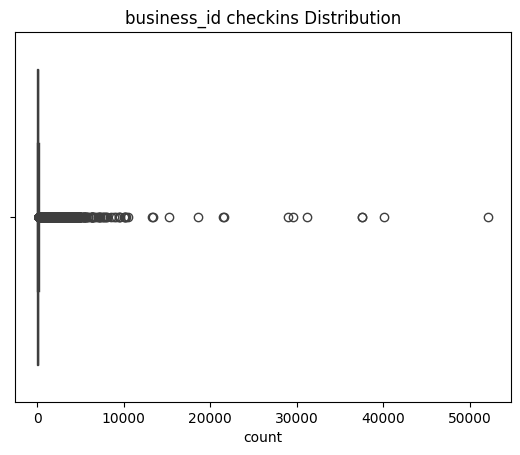

In [10]:
show_distribution(new_checkin_df, target_col="business_id", type="boxplot")

#### Drop outliers from check ins dataset

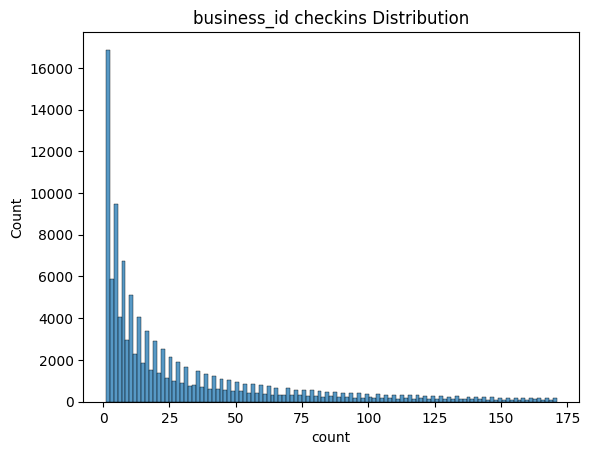

In [11]:
show_distribution(new_checkin_df, target_col="business_id", type="histogram", remove_outliers=True)

#### Analyze most frequented business and cities

In [22]:
def get_checkins_per_day(checkin_df: pd.DataFrame, business_id: str = None) -> pd.DataFrame:
    result_df = checkin_df.copy()

    if business_id is not None:
        result_df = checkin_df[checkin_df["business_id"] == business_id]
        return result_df.groupby(by="date").size()\
            .reset_index(name="count")\
            .sort_values(by="date")\
            .reset_index(drop=True)
    
    return result_df.groupby(by=["business_id", "date"]).date.size()\
        .reset_index(name="count")[["date", "count"]]\
        .groupby(by="date")["count"].mean().to_frame()


def plot_timeserie_checkins(ts_df: pd.DataFrame, business_id: str = None, moving_avg: bool = False, step: int = None) -> None:
    ts_ma = ts_df.copy()
    sns.lineplot(x="date", y="count", data=ts_df, label="Original Timeserie")

    if moving_avg:
        ts_ma[f"rolling_{step}"] = ts_ma["count"].rolling(window=step).mean()
        sns.lineplot(x=f"date", y=f"rolling_{step}", data=ts_ma, 
                     label=f"Moving Average - {step} days", alpha=0.8)
        
    if business_id is None:
        business_id = "ALL"
    plt.title(f"Checkins per day for {business_id} business_id")
    plt.show()


In [13]:
def get_most_freq_business(merged_df: pd.DataFrame, k: int = 500, city: str = None):
    if "city" not in merged_df.columns:
        raise KeyError("You should use the MERGED DATASET between checkins and business!")

    if city is not None:
        most_freq_business = merged_df[merged_df.city == city]
    else:
        most_freq_business = merged_df.copy()

    return most_freq_business.groupby("business_id").size()\
        .reset_index(name="count_checkins")\
            .sort_values(by="count_checkins", ascending=False)\
                .iloc[:k, :]

most_freq_business = get_most_freq_business(merged_df, k=500)
most_freq_business

business_id  count_checkins
878    -QI8Qi8XWH3D8y8ethnajA           52144
33681  FEXhWNCMkv22qG04E83Qjg           40109
32401  Eb1XmmLWyt_way5NNZ7-Pw           37562
83440  c_4c5rJECZSfNgFj7frwHQ           37518
11840  4i4kmYm9wgSNyF1b6gKphg           31168
...                       ...             ...
33958  FNjY9rzdB0j-DYuKC0DmOw            2139
387    -AaxZJ_I4rSFOBJbBz4SlQ            2138
44382  KXecZki-_3N7afs6HKWM3A            2137
67177  VeJqScDLsoA5WasQSv_Jfw            2137
7839   2i6DI1RBQIaD5DxHYHot7g            2135

[500 rows x 2 columns]

In [14]:
topk_business_checkins = merged_df[merged_df["business_id"].isin(most_freq_business.business_id)].drop_duplicates(subset=["business_id"])
topk_business_checkins.head()

business_id        date                                name  \
7055   -1B9pP_CrRBJYPICE5WbRA  2012-07-19                            Spice 28   
34036  -9NmUeTphyS9Lq1o9MACGw  2010-02-26                      Grand Ole Opry   
43881  -AaxZJ_I4rSFOBJbBz4SlQ  2010-06-12                   Hansen's Sno-Bliz   
59859  -FM4CxOg4XXmX_Ebky_SiQ  2013-04-15                        Finch & Fork   
77413  -K0LoSCfh8i5U_y53Krepg  2010-04-20  International Plaza and Bay Street   

                     address           city state postal_code   latitude  \
7055        1228 Chestnut St   Philadelphia    PA       19107  39.950352   
34036       2804 Opryland Dr      Nashville    TN       37214  36.206904   
43881  4801 Tchoupitoulas St    New Orleans    LA       70115  29.917084   
59859       31 W Carrillo St  Santa Barbara    CA       93101  34.420361   
77413  2223 N Westshore Blvd          Tampa    FL       33607  27.960874   

        longitude  stars  review_count  is_open  \
7055   -75.161583    4.0           822        1   
34036  -86.692294    4.5           687        1   
43881  -90.105405    4.5           512        1   
59859 -119.702475    4.0          1405        1   
77413  -82.523089    4.5           261        1   

                                              attributes  \
7055   {'RestaurantsGoodForGroups': 'True', 'WiFi': '...   
34036  {'Alcohol': 'u'full_bar'', 'BusinessAcceptsCre...   
43881  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
59859  {'RestaurantsTakeOut': 'True', 'BikeParking': ...   
77413  {'BikeParking': 'True', 'BusinessAcceptsCredit...   

                                              categories  \
7055   Asian Fusion, Restaurants, American (New), Tha...   
34036  Performing Arts, Cinema, Tours, Local Flavor, ...   
43881        Ice Cream & Frozen Yogurt, Food, Shaved Ice   
59859  Breakfast & Brunch, American (New), Restaurant...   
77413  Shopping, Nightlife, Shopping Centers, Bars, R...   

                                                   hours  
7055   {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:30...  
34036  {'Monday': '10:0-16:0', 'Tuesday': '17:30-21:3...  
43881  {'Tuesday': '12:0-18:0', 'Wednesday': '12:0-18...  
59859  {'Monday': '17:30-23:0', 'Tuesday': '17:0-21:0...  
77413  {'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ...

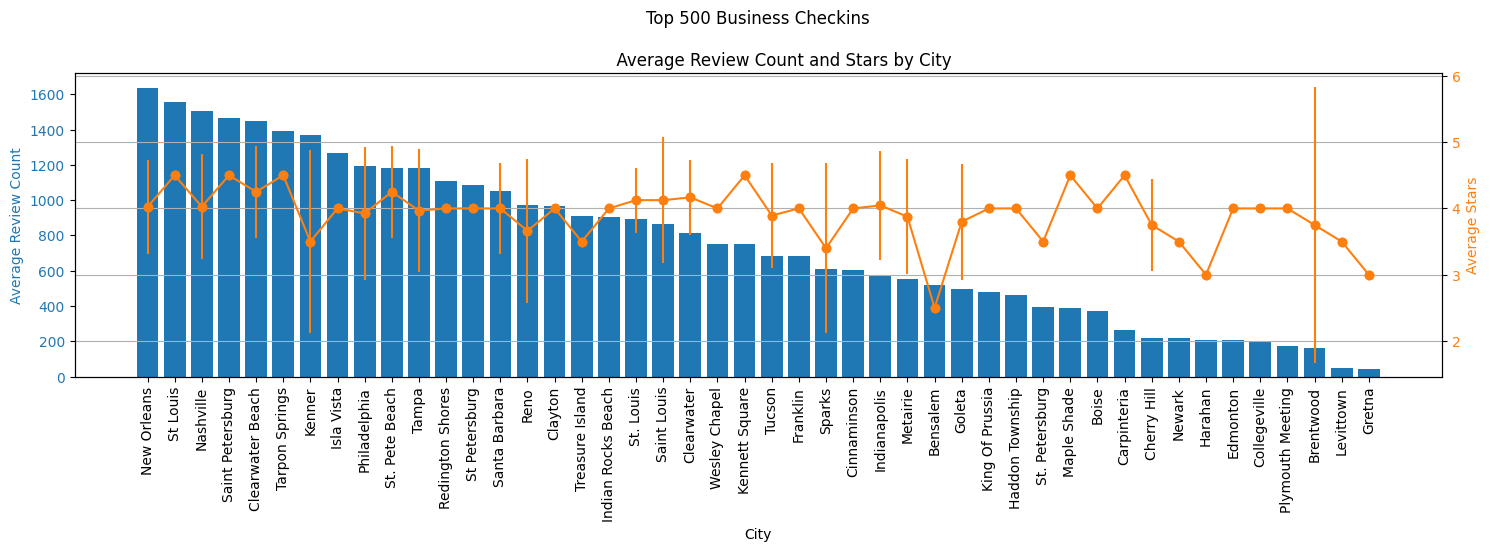

In [15]:
grouped_topk = topk_business_checkins.groupby("city")[["review_count", "stars"]]
grouped_topk_review_stars = grouped_topk.mean().sort_values(by="review_count", ascending=False)
grouped_top_k_std_stars = grouped_topk.agg({"review_count": "mean", "stars": "std"}).sort_values(by="review_count", ascending=False)

# Plot the chart
fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('City')
ax1.set_ylabel('Average Review Count', color=color)
ax1.bar(grouped_topk_review_stars.index, grouped_topk_review_stars['review_count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)

# Adding a second axis for the average stars
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Average Stars', color=color)
ax2.plot(grouped_topk_review_stars.index, grouped_topk_review_stars['stars'], color=color, marker='o')
ax2.errorbar(grouped_topk_review_stars.index, grouped_topk_review_stars['stars'], yerr=1.96 *grouped_top_k_std_stars.stars, fmt='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(True)

fig.tight_layout()
plt.title("""Top 500 Business Checkins\n
          Average Review Count and Stars by City""")
plt.show()

#### Analyze time series for the chosen city

In [22]:
CITY = "Philadelphia"
most_freq_bid_city = get_most_freq_business(merged_df, k=1, city=CITY)
most_freq_bid_city

business_id  count_checkins
84  -QI8Qi8XWH3D8y8ethnajA           52144

In [23]:
most_freq_bid = most_freq_bid_city.business_id.values[0]

In [24]:
ts_df = get_checkins_per_day(merged_df, business_id=most_freq_bid)
ts_df.sort_values(by="count", ascending=False)


date  count
872   2012-08-06     39
1662  2014-10-06     38
1613  2014-08-18     35
1581  2014-07-17     35
1647  2014-09-21     34
...          ...    ...
3690  2020-06-01      1
3689  2020-05-31      1
3688  2020-05-30      1
4053  2021-07-17      1
0     2010-01-17      1

[4233 rows x 2 columns]

In [29]:
ts_df.sort_values(by="date").to_csv("timeseries_example.csv", index=False)

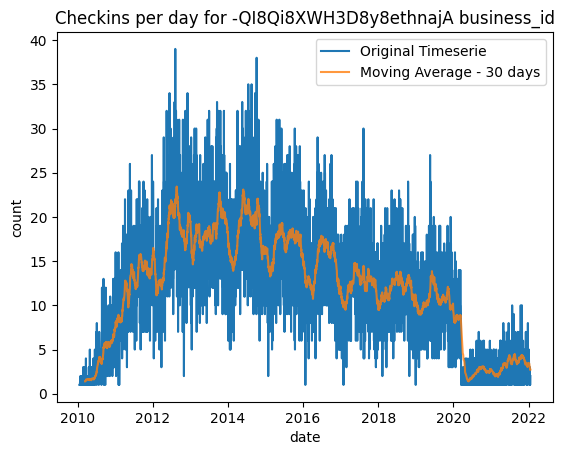

In [25]:
plot_timeserie_checkins(ts_df=ts_df,
                        business_id=most_freq_bid,
                        moving_avg=True,
                        step=30)

#### Time series for all business on average

In [26]:
ts_all_business = get_checkins_per_day(merged_df)
ts_all_business.sort_values(by="count", ascending=False)

count
date                
2016-06-25  1.742012
2015-09-06  1.567795
2015-08-30  1.560538
2015-05-24  1.553636
2014-05-25  1.547315
...              ...
2010-01-22  1.013889
2010-02-02  1.012987
2009-12-31  1.000000
2010-01-16  1.000000
2009-12-30  1.000000

[4389 rows x 1 columns]

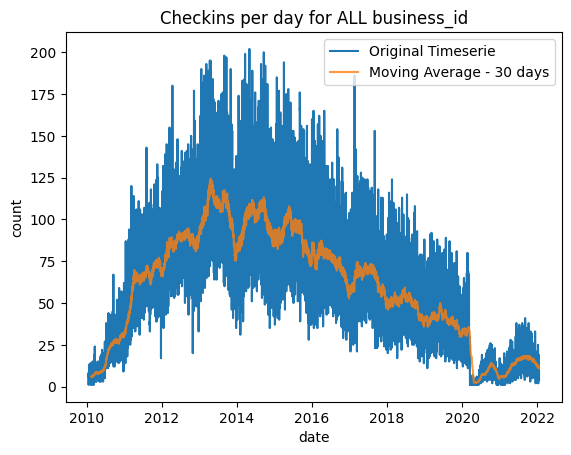

In [24]:
plot_timeserie_checkins(ts.rename(columns={"checkins": "count"}), moving_avg=30, step=30)